<center>
    <h1> 💳 Credit Card Fraud Detection</h1>
    <h3> Task No.2, Codsoft Data Science Internship</h3>
</center>

# Aim -
##### To create a **Machine Learning Model** which Identify the transactions are Legit or Fraudulent

<center>
    <h1>Installing and Importing Necessary Libraries / Dependencies</h1>
</center>

In [2]:
%pip install plotly
%pip install imbalanced-learn
%pip install xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df = pd.read_csv(r"C:\Users\Nishs\OneDrive\Desktop\Codsoft - Data Science Internship - Tasks\Task 2 - Credit Card Fraud Detection\creditcard.csv") # loading the dataset

In [ ]:
df.head() # displaying the first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info() # displaying the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum() # checking for null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df['Class'].value_counts() # displaying the count of each class

Class
0    284315
1       492
Name: count, dtype: int64

## This Dataset is highly unbalanced

#### 0 - Legit/Normal Transaction
#### 1 - Fraudulent Transaction

In [ ]:
Legit = df[df.Class == 0] # creating a dataframe for legitimate transactions
Fraud = df[df.Class == 1] # creating a dataframe for fraudulent transactions

In [ ]:
print(Legit.shape) # displaying the shape of the dataframes
print(Fraud.shape) 

(284315, 31)
(492, 31)


In [ ]:
Legit.Amount.describe() # displaying the descriptive statistics of the legitimate transactions

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
Fraud.Amount.describe() # displaying the descriptive statistics of the fraudulent transactions

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
df.groupby('Class').mean() # displaying the mean values of each feature for each class

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Building a sample dataset containing similar distribution of Legit transactions and Fraudulent transactions

#### **Number of Fraudulent Transactions = 492**

In [ ]:
Legit_Sample = Legit.sample(n=492) # creating a sample of 492 legitimate transactions

#### Concatenating two DataFrames

In [ ]:
ND = pd.concat([Legit_Sample, Fraud], axis=0) # concatenating the sample of legitimate transactions with the fraudulent transactions

In [ ]:
ND.head() # displaying the first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192576,129762.0,2.002533,-0.275821,-1.058539,0.335460,-0.302323,-0.907482,-0.087903,-0.035947,0.625100,...,-0.252651,-0.737194,0.372547,-0.045453,-0.433220,0.186111,-0.086438,-0.074760,1.98,0
65725,51717.0,-1.654749,0.615735,0.652041,-1.213781,-0.580691,-0.358295,1.197547,0.340408,-0.467009,...,-0.032137,-0.105569,-0.054096,0.058693,0.706208,1.042379,-0.012311,-0.052619,182.00,0
185270,126600.0,2.132337,-1.012908,-1.511060,-1.043086,-0.574359,-0.836558,-0.527697,-0.155231,-0.469026,...,0.472979,1.182908,-0.100255,-0.474245,0.150944,0.086731,-0.058771,-0.075954,54.70,0
180065,124360.0,1.616699,-0.849782,-2.019381,-0.157013,0.999469,1.288207,0.069814,0.222812,0.070930,...,0.409735,0.946734,-0.099877,-0.844580,-0.125276,0.846795,-0.081098,-0.057710,189.75,0
258078,158483.0,2.060602,-0.121952,-1.081612,0.428292,-0.236531,-1.242500,0.118216,-0.279596,0.690273,...,-0.299912,-0.778340,0.352996,0.019310,-0.333021,0.198669,-0.077205,-0.061933,1.98,0


In [ ]:
ND.tail() # displaying the last 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
ND['Class'].value_counts() # displaying the count of each class

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
ND.groupby('Class').mean() # displaying the mean values of each feature for each class

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94191.445122,0.011115,0.004796,-0.045969,0.025061,-0.048269,-0.007299,-0.042142,-0.047688,-0.037752,...,-0.035570,0.053069,0.018366,0.003666,0.018526,0.013296,0.014407,-0.012727,0.006790,89.089126
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Splitting the data into Features & Targets

In [ ]:
X = ND.drop(columns='Class', axis=1) # dropping the 'Class' column
Y = ND['Class'] # storing the 'Class' column in a variable

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
192576  129762.0  2.002533 -0.275821 -1.058539  0.335460 -0.302323 -0.907482   
65725    51717.0 -1.654749  0.615735  0.652041 -1.213781 -0.580691 -0.358295   
185270  126600.0  2.132337 -1.012908 -1.511060 -1.043086 -0.574359 -0.836558   
180065  124360.0  1.616699 -0.849782 -2.019381 -0.157013  0.999469  1.288207   
258078  158483.0  2.060602 -0.121952 -1.081612  0.428292 -0.236531 -1.242500   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y) # displaying the 'Class' column

192576    0
65725     0
185270    0
180065    0
258078    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


#### Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) # splitting the data into training and testing sets

In [ ]:
print(X.shape, X_train.shape, X_test.shape,) # displaying the shape of the data

(984, 30) (787, 30) (197, 30)


### Model Training

### Logistic Regression

In [ ]:
model = LogisticRegression() # creating a Logistic Regression model

In [ ]:
model.fit(X_train, Y_train) # fitting the model

LogisticRegression()

### Model Evaluation

### Accuracy Score

In [ ]:
X_train_prediction = model.predict(X_train) # making predictions on the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) # calculating the accuracy

In [ ]:
print('Accuracy on Training data: ', training_data_accuracy) # displaying the accuracy

Accuracy on Training data:  0.9390088945362135


In [ ]:
X_test_prediction = model.predict(X_test) # making predictions on the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) # calculating the accuracy

In [ ]:
print('Accuracy score on Test Data: ', test_data_accuracy) # displaying the accuracy

Accuracy score on Test Data:  0.9238578680203046


# Correlation Analysis

In [ ]:
corr_matrix = df.corr() # calculating the correlation matrix
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
target_corr = corr_matrix['Class'].sort_values(ascending=False) # sorting the correlation values
target_corr

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

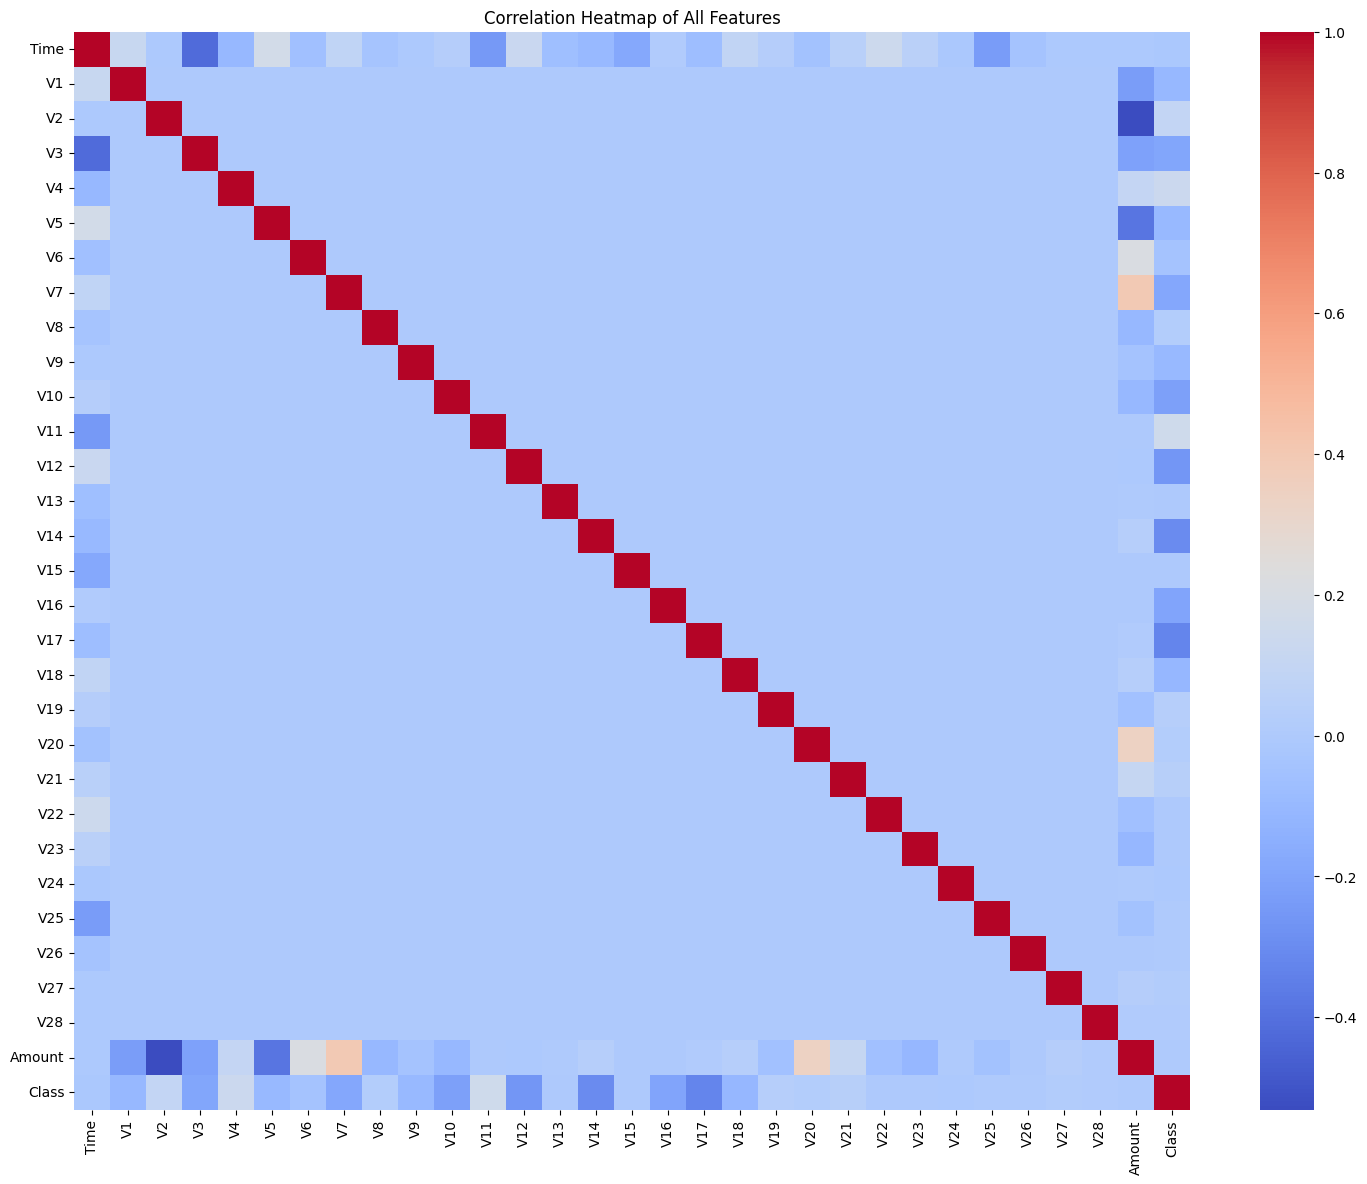

In [ ]:
# Visualize correlation heatmap

plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=',2f')
plt.title('Correlation Heatmap of All Features')
plt.show()

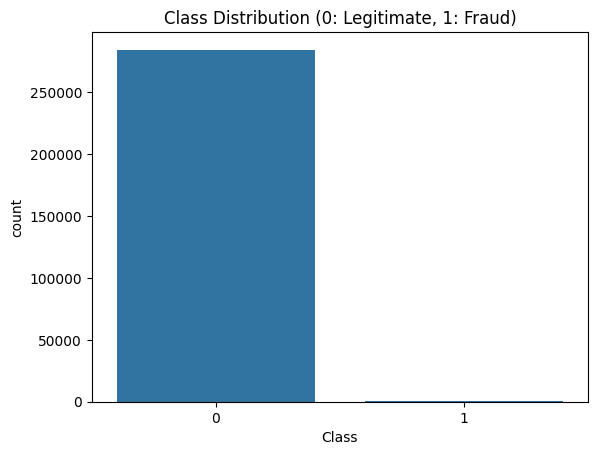

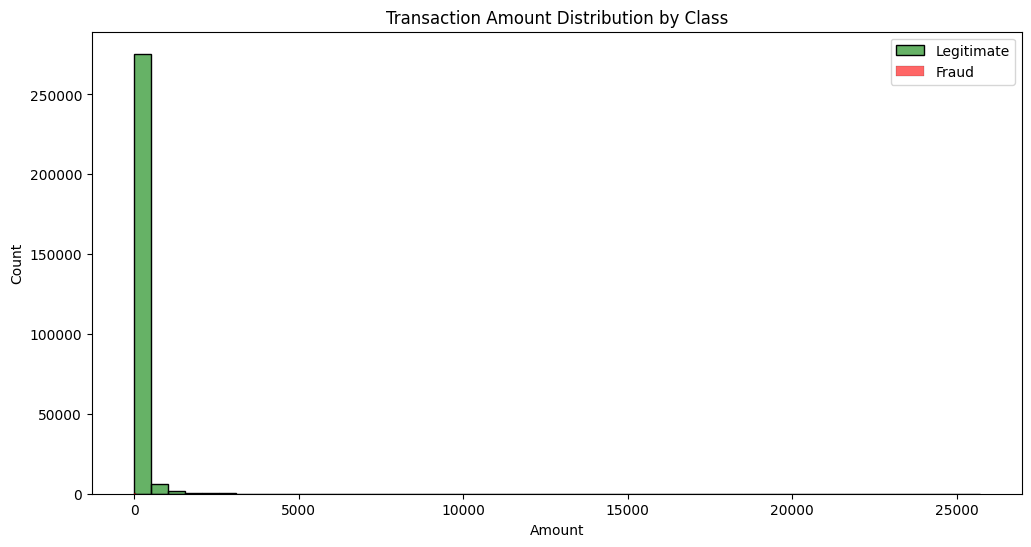

In [33]:
# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.show()

# Compare transaction amount distributions
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green', label='Legitimate', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title('Transaction Amount Distribution by Class')
plt.show()

In [ ]:
# Example for SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('Original dataset shape:', y.value_counts())
print('Resampled dataset shape:', y_resampled.value_counts())

Original dataset shape: Class
0    284315
1       492
Name: count, dtype: int64
Resampled dataset shape: Class
0    284315
1    284315
Name: count, dtype: int64


In [35]:
# Example: Create a feature for transaction hour
df['Hour'] = (df['Time'] // 3600) % 24

# Example: Log-transform Amount to reduce skewness
df['Log_Amount'] = np.log1p(df['Amount'])


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(), # creating a Logistic Regression model
    'Random Forest': RandomForestClassifier(), # creating a Random Forest model
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss') # use_label_encoder=False
}

for name, model in models.items(): # iterating over the models
    model.fit(X_resampled, y_resampled) # fitting the model
    preds = model.predict(X_test) # making predictions
    print(f"Results for {name}:") # printing the results
    print(classification_report(Y_test, preds)) # displaying the classification report
    print("ROC-AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])) # displaying the ROC-AUC score
    print('-'*50) # printing a separator

Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

ROC-AUC: 0.9811379097093382
--------------------------------------------------
Results for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        98

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197

ROC-AUC: 1.0
--------------------------------------------------
Results for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1 

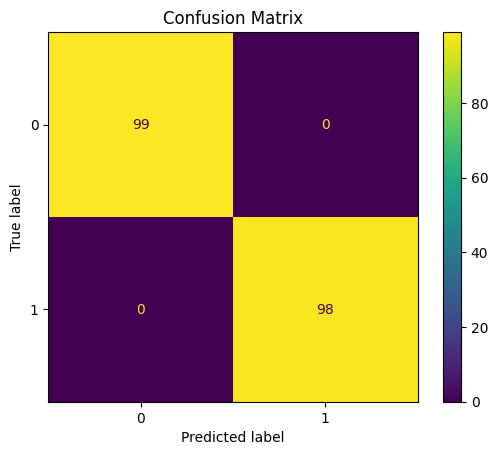

In [ ]:
# Example for Random Forest
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
preds = rf.predict(X_test)

# Example for Confusion Matrix
cm = confusion_matrix(Y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
